In [135]:
import pandas as pd

train = pd.read_csv('data/train.csv', sep=';')
test = pd.read_csv('data/test.csv', sep=';')

In [136]:
X_train = pd.read_csv('data/X_train.csv', sep=';')
X_test = pd.read_csv('data/X_test.csv', sep=';')
y_train = pd.read_csv('data/y_train.csv', sep=';')
y_test = pd.read_csv('data/y_test.csv', sep=';')

In [142]:
merged = pd.read_csv('data/merged.csv', sep=';')

/Users/max/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [149]:
len(merged[merged['OrderQty'].isnull()]['ID'].unique())

38676

In [148]:
116028 / 3

38676.0

In [139]:
test.head()

,ID,SalOrg,Material,date
0,0,97LK,00IYcj,2017-04
1,1,97LK,00lqzT,2017-04
2,2,97LK,00MFcK,2017-04
3,3,97LK,00mt9e,2017-04
4,4,97LK,00Ok8y,2017-04


In [110]:
test = pd.read_csv('data/eval.csv', sep=',')

In [119]:
train.shape

(5595701, 41)

In [111]:
test.head()

,ID,SalOrg,Material,date
0,0,97LK,00IYcj,2017-04
1,1,97LK,00lqzT,2017-04
2,2,97LK,00MFcK,2017-04
3,3,97LK,00mt9e,2017-04
4,4,97LK,00Ok8y,2017-04


In [151]:
features = pd.read_csv('data/merged.csv', sep=';')

/Users/max/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
# Fill dates
features['Month'].fillna(features['date'], inplace=True)

# Parse date
features['Month'] = pd.to_datetime(features['Month'])
features['month'] = features['Month'].dt.month
features['year'] = features['Month'].dt.year

In [153]:
features['month_mod'] = features['month'] % 3

In [175]:
subset = features[features['month_mod'] == 0]

In [178]:
subset.head()

,ID,Material,Month,OrderQty,SalOrg,date,month,year,month_mod
0,2724174,iR1zr2,2014-09-01,1.0,yqSu,NaN,9,2014,0
9,2186093,W4hkIX,2016-06-01,5.0,yqSu,NaN,6,2016,0
15,2499861,gsajF3,2012-03-01,2.0,yqSu,NaN,3,2012,0
17,2833221,Hixk6q,2013-03-01,120.0,yqSu,NaN,3,2013,0
21,4707101,iGkfIY,2013-03-01,1.0,yqSu,NaN,3,2013,0


In [179]:
subset['previous_ordered_mod'] = pd.concat([
    g.sort_values('Month')['OrderQty'].shift(1)
    for _, g in subset.groupby('Material')
])

subset.sort_values(['Material', 'Month'])

/Users/max/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Material,Month,OrderQty,SalOrg,date,month,year,month_mod,previous_ordered_mod
1272707,3057531,00GB1f,2012-03-01,1.0,yqSu,NaN,3,2012,0,NaN
469331,3057532,00GB1f,2012-06-01,1.0,yqSu,NaN,6,2012,0,1.0
1830495,3058321,00GB1f,2014-09-01,1.0,yqSu,NaN,9,2014,0,1.0
4985685,3057890,00GB1f,2014-09-01,1.0,yqSu,NaN,9,2014,0,1.0
2060449,3057881,00GB1f,2016-06-01,1.0,yqSu,NaN,6,2016,0,1.0
110869,3057893,00GB1f,2016-12-01,1.0,yqSu,NaN,12,2016,0,1.0
5699183,26130,00GB1f,2017-06-01,NaN,yqSu,2017-06,6,2017,0,1.0
427728,1477569,00IYcj,2012-03-01,1.0,U12J,NaN,3,2012,0,1.0
1752311,1487377,00IYcj,2012-03-01,1.0,U12J,NaN,3,2012,0,NaN
2217373,3808102,00IYcj,2012-03-01,1.0,yqSu,NaN,3,2012,0,1.0


In [185]:
sss = subset[(subset['Material'] == 'iR1zr2') & (subset['SalOrg'] == 'U12J')].sort_values('Month')[-8:]

In [192]:
sss['missing_months'] = sss['Month'].diff()
sss

,ID,Material,Month,OrderQty,SalOrg,date,month,year,month_mod,previous_ordered_mod,missing_months
864565,315167,iR1zr2,2016-03-01,1.0,U12J,NaN,3,2016,0,1.0,NaT
4892472,312653,iR1zr2,2016-03-01,1.0,U12J,NaN,3,2016,0,3.0,0 days
935250,311516,iR1zr2,2016-06-01,1.0,U12J,NaN,6,2016,0,1.0,92 days
1619574,311676,iR1zr2,2016-06-01,1.0,U12J,NaN,6,2016,0,2.0,0 days
3328380,313045,iR1zr2,2016-06-01,1.0,U12J,NaN,6,2016,0,1.0,0 days
1688344,311601,iR1zr2,2017-03-01,1.0,U12J,NaN,3,2017,0,1.0,273 days
3260757,312896,iR1zr2,2017-03-01,1.0,U12J,NaN,3,2017,0,1.0,0 days
5695017,21964,iR1zr2,2017-06-01,NaN,U12J,2017-06,6,2017,0,NaN,92 days


In [172]:
train.groupby(['SalOrg', 'Material', 'Month'])['OrderQty', 'ID'].sum().to_frame('OrderQty').reset_index()

,SalOrg,Material,Month,OrderQty
0,97LK,00IYcj,2012-05,2
1,97LK,00IYcj,2012-06,13
2,97LK,00IYcj,2012-07,1
3,97LK,00IYcj,2012-09,30
4,97LK,00IYcj,2012-11,1
5,97LK,00IYcj,2012-12,4
6,97LK,00IYcj,2013-01,16
7,97LK,00IYcj,2013-02,15
8,97LK,00IYcj,2013-03,7
9,97LK,00IYcj,2013-04,15


In [165]:
subset[subset['Material'] == 'iR1zr2']

,ID,Material,Month,OrderQty,SalOrg,date,month,year,month_mod
0,2724174,iR1zr2,2014-09-01,1.0,yqSu,NaN,9,2014,0
13061,5733442,iR1zr2,2012-09-01,1.0,OQfZ,NaN,9,2012,0
13663,5730147,iR1zr2,2012-09-01,3.0,OQfZ,NaN,9,2012,0
16760,2724010,iR1zr2,2015-03-01,1.0,yqSu,NaN,3,2015,0
49282,2717392,iR1zr2,2012-03-01,1.0,yqSu,NaN,3,2012,0
112568,2717764,iR1zr2,2012-06-01,1.0,yqSu,NaN,6,2012,0
118283,2720974,iR1zr2,2016-09-01,3.0,yqSu,NaN,9,2016,0
136168,5734342,iR1zr2,2012-12-01,1.0,OQfZ,NaN,12,2012,0
141375,2717463,iR1zr2,2016-06-01,1.0,yqSu,NaN,6,2016,0
165858,5732787,iR1zr2,2014-06-01,5.0,OQfZ,NaN,6,2014,0


In [157]:
38676 * 3

116028

In [92]:
meds = sample.groupby('Material')['OrderQty'].median().to_frame()

In [93]:
meds

,OrderQty
Material,
00IYcj,1.0
00MFcK,1.0
00Ok8y,1.0
00lqzT,1.0
00mt9e,2.0
01f4Vq,1.0
02Hg4G,1.0
02jRc8,1.0
0355Np,1.0


In [87]:
sample['date'].dt.month

1228064    11
5169134     4
529792      2
57262       8
5053452    12
4382296     9
3788200     3
5513411    10
5040651     2
4633035     8
1793151     5
1493706     6
2786749     3
2606787     6
2459900     2
2735889    12
954736      1
3174532     3
3889070     6
3788003    12
2725207     5
3928483     5
726539     11
1781083     5
4273955     3
2945408     1
3690911     4
1371248     9
4153796     2
1699529     2
           ..
2286895     2
1154201     2
4782075     2
288996      9
5490385    10
5308327    12
1932034     4
1712366    11
2250691    11
3889982     1
997315     11
2420718     6
5406125     1
3782843     3
713971      1
274945      4
5560937     1
2350234    11
4043333    10
5132438    10
3867193     6
3972805     4
738465     11
5048710    12
5149352     1
235301     10
4469881    11
2597179     3
1221679     8
3194834    12
Name: date, Length: 100000, dtype: int64

In [ ]:
train

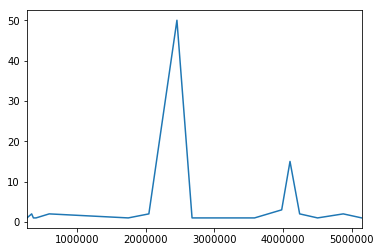

In [122]:
%matplotlib inline

sample[sample['Material'] == sample['Material'].unique()[19]].sort_index()['OrderQty'].plot()

In [8]:
import xam

cont_imp, disc_imp = xam.feature_selection.feature_importance_classification(X_train, y_train['Survived'], random_state=1)

cont_imp.sort_values('f_p_value')

,f_statistic,f_p_value,mutual_information
fare,63.030764,6.120189e-15,0.124183
age,3.761528,5.276069e-02,0.029486


In [10]:
disc_imp.sort_values('chi2_p_value')

,chi2_statistic,chi2_p_value,cramers_v,mutual_information
is_male,260.717020,1.197357e-58,0.540200,0.150870
p_class,102.888989,4.549252e-23,0.336684,0.058107
n_words_in_name,86.921615,5.296551e-16,0.299651,0.049138
family_size,80.672313,3.579669e-14,0.285735,0.047781
sib_sp,37.271793,1.558581e-06,0.187428,0.023197
parch,27.925784,9.703526e-05,0.156934,0.016366


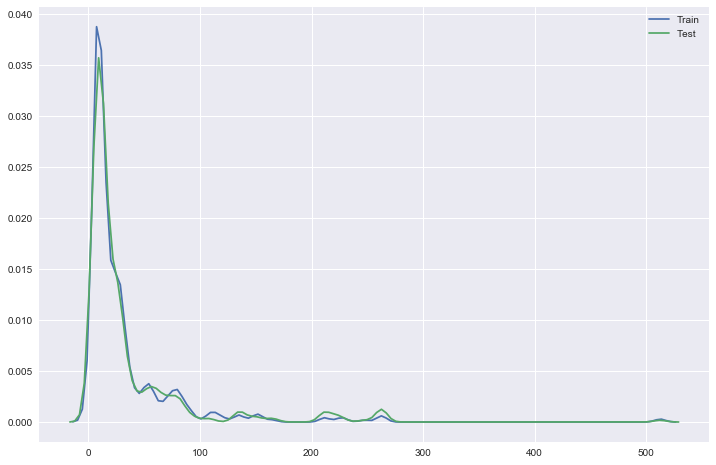

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, ax = plt.subplots(figsize=[12, 8])

sns.kdeplot(X_train['fare'], label='Train', ax=ax)
sns.kdeplot(X_test['fare'], label='Test', ax=ax)
ax.legend();